In [2]:
#  Imports
!pip install networkx matplotlib pandas numpy scikit-learn sentence-transformers

import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random
from collections import defaultdict

Question_Asked = []

  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
     ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
     --------------------------------------- 0.0/11.1 MB 640.0 kB/s eta 0:00:18
     --------------------------------------- 0.0/11.1 MB 640.0 kB/s eta 0:00:18
     --------------------------------------- 0.1/11.1 MB 465.5 kB/s eta 0:00:24
     --------------------------------------- 0.1/11.1 MB 581.0 kB/s eta 0:00:19
     --------------------------------------- 0.1/11.1 MB 514.3 kB/s eta 0:00:22
      -------------------------------------- 0.2/11.1 MB 653.6 kB/s eta 0:00:17
      -------------------------------------- 0.2/11.1 MB 653.6 kB/s eta 0:00:17
      -------------------------------------- 0.2/11.1 MB 653.6 kB/s eta 0:00:17
      -------------------------------------- 0.2/11.1 MB 550.0 kB/s eta 0:00:20
     - ------------------------------------- 0.3/11.1 MB 679.3 kB/s eta 0:00:16
     - ------------------------------------- 0.3/11.1 MB 675.6 k


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip
c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

user_skills = [
    "C/C++",
    "Python",
    "HTML/CSS",
    "Javascript",
    "React JS",
    "Node JS",
    "Next JS",
    "Flask",
    "React Native",
    "Docker",
    "Linux",
    "Git",
    "Github",
    "MongoDB",
    "Express.js",
    "Firebase",
    "tailwind",
    "PostgreSQL",
    "WebSockets",
    "Qt",
    "Time management",
    "Prioritization",
    "Collaboration"
    "Rust",
    "Fotran",
    "cobalt",
    "flutter"
]

job_description_string = """
**Job Title:** Senior React App Engineer

**Location:** Defence Housing Authority, Karachi, Sindh, Pakistan (Hybrid)

**About TechSpark Innovations:**

TechSpark Innovations is a rapidly growing tech company based in Karachi, dedicated to building cutting-edge software solutions for the logistics and supply chain industry. We foster a collaborative and innovative environment where every team member's contributions are valued. We're passionate about leveraging the latest technologies to solve complex real-world problems and are looking for enthusiastic individuals to join us on this exciting journey.

**Job Summary:**

TechSpark Innovations is seeking a highly skilled and experienced Senior React App Engineer to lead the development of our next-generation web applications. You will play a crucial role in architecting, building, and maintaining robust and scalable user interfaces using React.js and related technologies. You will work closely with our product, design, and backend teams to deliver exceptional user experiences and drive the technical direction of our front-end development efforts.

**Responsibilities:**

* Architect and develop complex web applications using React.js, Next.js, and related JavaScript frameworks.
* Write high-quality, performant, and well-tested code, adhering to best practices and coding standards.
* Collaborate closely with UI/UX designers to implement intuitive and visually appealing user interfaces, leveraging Tailwind CSS.
* Integrate front-end applications seamlessly with backend APIs built with Node.js, Express.js, and Flask.
* Utilize Git and GitHub for version control and collaborative development workflows.
* Deploy and manage applications using Docker in a Linux environment.
* Work with databases such as MongoDB and PostgreSQL to support application data requirements.
* Implement real-time features using WebSockets where necessary.
* Participate in code reviews, providing constructive feedback and ensuring code quality across the team.
* Troubleshoot and debug complex front-end issues, optimizing application performance and stability.
* Stay abreast of the latest advancements in front-end development and propose innovative solutions.
* Effectively manage your time and prioritize tasks to meet project deadlines.
* Collaborate effectively with cross-functional teams, contributing to a positive and productive work environment.

**Qualifications:**

* 5+ years of professional experience in front-end web development with a strong focus on React.js.
* Deep understanding of JavaScript (ES6+), including asynchronous programming, closures, and component-based architecture.
* Extensive experience with React.js ecosystem, including state management libraries (e.g., Redux, Context API), routing (React Router), and form handling.
* Solid experience with Next.js for server-side rendering and building full-stack applications.
* Proficiency in HTML, CSS, and responsive design principles, with hands-on experience using Tailwind CSS.
* Experience integrating with RESTful APIs and a good understanding of API design principles.
* Familiarity with Node.js and Express.js for backend development or full-stack capabilities.
* Experience with database technologies such as MongoDB and PostgreSQL.
* Practical experience with Docker and working in a Linux environment.
* Proficient in using Git and GitHub for version control and collaboration.
* Excellent time management and prioritization skills with the ability to manage multiple tasks effectively.
* Strong collaboration and communication skills, with the ability to work effectively within a team.
* Bachelor's degree in Computer Science, Software Engineering, or a related field.

**Bonus Points:**

* Experience with React Native for building mobile applications.
* Familiarity with Firebase for backend services.
* Exposure to C/C++ or Qt for specific performance-critical modules or desktop application development.
* Experience with testing frameworks (e.g., Jest, Enzyme, React Testing Library).
* Knowledge of CI/CD pipelines and deployment strategies.
* Contributions to open-source projects.

**To Apply:**

Interested candidates are invited to submit their resume and a cover letter highlighting their relevant experience to careers@techsparkinnovations.com with the subject line "Senior React App Engineer Application". Please also include a link to your GitHub profile or portfolio if available.
"""

path = "./content/Software Questions.csv"

try:
    questions_df = pd.read_csv(path, encoding='latin-1')
    difficulty_mapping = {
        "Easy": 2,
        "Medium": 1,
        "Hard": 0,
        "easy": 2,
        "medium": 1,
        "hard": 0,
    }
    questions_df["Difficulty"] = questions_df["Difficulty"].map(difficulty_mapping)
    questions_df["asked"] = False
    print("Successfully read with latin-1 encoding.")
except UnicodeDecodeError:
    print("You might need to try other encodings or inspect the file.")
    exit()

model = SentenceTransformer('all-MiniLM-L6-v2')

job_description_skills = [skill.lower() for skill in user_skills if skill.lower() in job_description_string.lower()]


if job_description_skills:
    job_skill_embeddings = [model.encode(skill) for skill in job_description_skills]
else:
    print("No relevant skills found in the job description based on the user_skills list.")
    job_skill_embeddings = []
    exit()


user_skill_embeddings = [model.encode(skill) for skill in user_skills]

questions_df["embedding"] = questions_df["Question"].apply(lambda x: model.encode(str(x)))

def calculate_max_similarity(question_embedding, skill_embeddings):
    """Calculates the maximum cosine similarity between a question and any of the provided skills."""
    if not skill_embeddings:
        return 0.0
    similarities = [cosine_similarity([skill_embedding], [question_embedding])[0][0]
                    for skill_embedding in skill_embeddings]
    return max(similarities) if similarities else 0.0

def calculate_avg_similarity(question_embedding, user_skill_embeddings):
    """Calculates the average cosine similarity between a question and any of the user's skills."""
    similarities = [cosine_similarity([skill_embedding], [question_embedding])[0][0]
                    for skill_embedding in user_skill_embeddings]
    avg = 0
    for val in similarities:
      avg = avg + val
    avg = avg / len(similarities)
    return avg if similarities else 0.0


questions_df["jd_score"] = questions_df["embedding"].apply(
    lambda x: calculate_max_similarity(x, job_skill_embeddings)
)


questions_df["user_score"] = questions_df["embedding"].apply(
    lambda x: calculate_avg_similarity(x, user_skill_embeddings)
)

questions_df['score'] = 0.6*questions_df['jd_score'] + 0.4*questions_df['user_score']
print(questions_df[["Question", "Difficulty", "jd_score", "user_score"]].head())


Successfully read with latin-1 encoding.


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\pc\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. 

                                            Question  Difficulty  jd_score  \
0  What is the difference between compilation and...           1  0.227963   
1               Explain the concept of polymorphism.           1  0.173244   
2          Define encapsulation and give an example.           0  0.258099   
3  What is an abstract class, and how is it diffe...           1  0.188277   
4  Describe the principles of Object-Oriented Pro...           1  0.391081   

   user_score  
0    0.040525  
1    0.059690  
2    0.108205  
3    0.050460  
4    0.115049  


In [6]:
graph = defaultdict(list)


for category in questions_df["Category"].unique():
    cat_qs = questions_df[questions_df["Category"] == category].sort_values("Difficulty")
    # print(category)
    prev_row = None
    for _, current_row in cat_qs.iterrows():
        if prev_row is not None:
            graph[prev_row["Question Number"]].append(current_row["Question Number"])
        prev_row = current_row


In [7]:
count = 0
for category in questions_df["Category"]:
    if category == "General Programming":
      count = count + 1
count

9

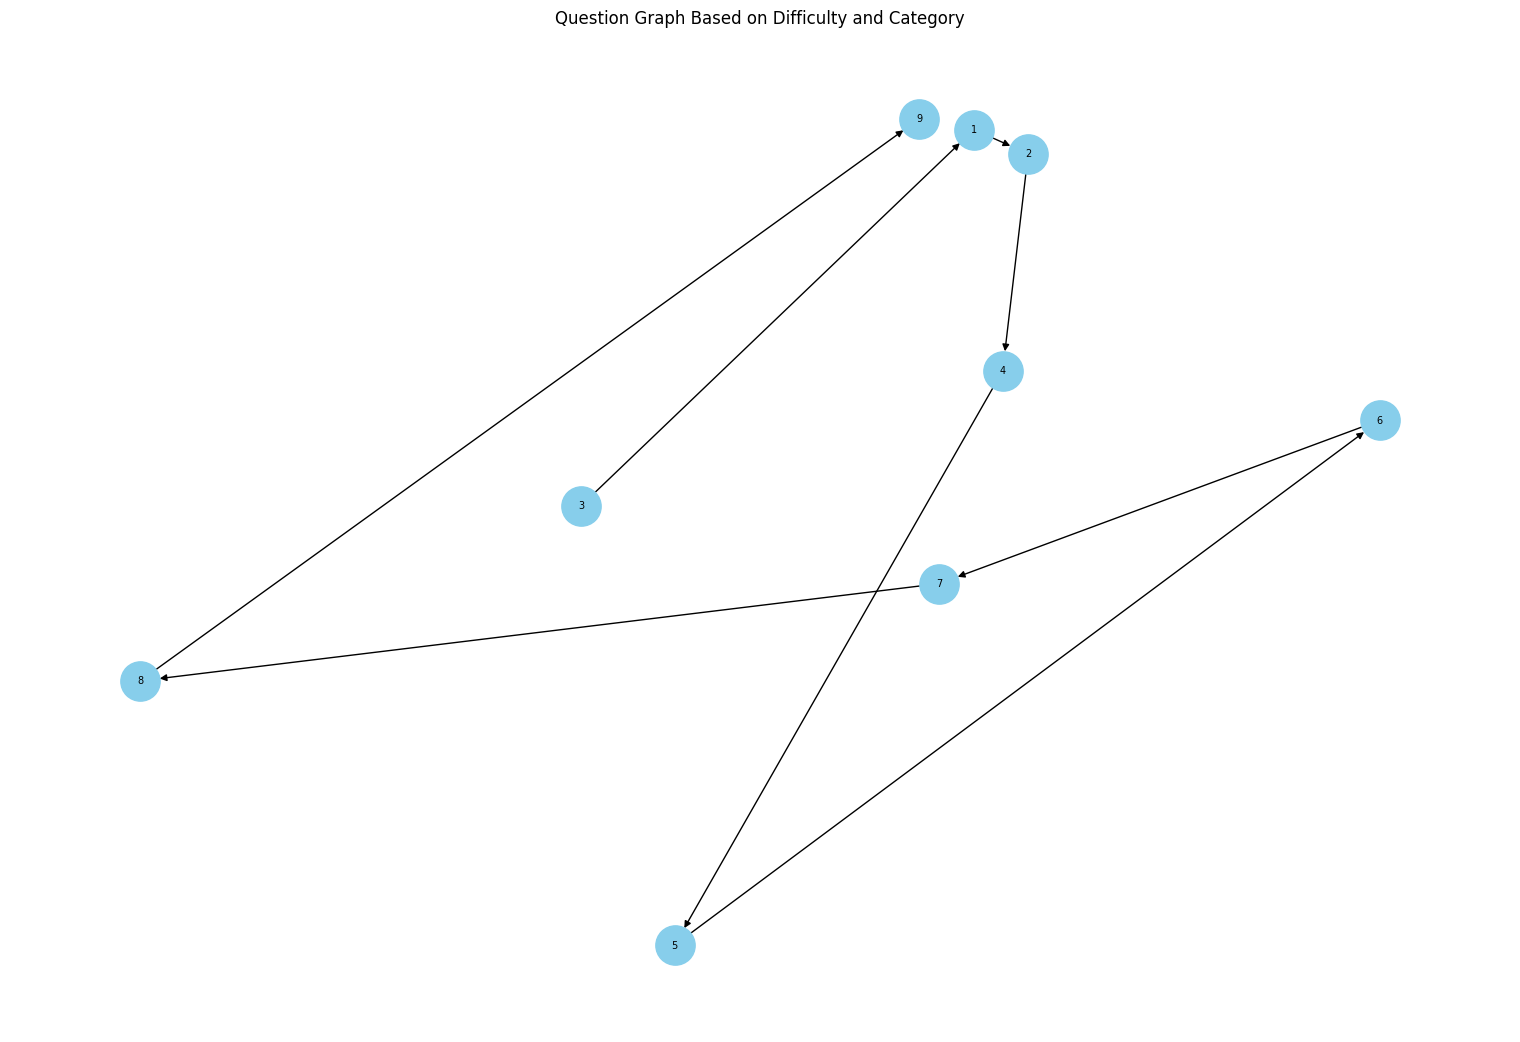

In [8]:


G = nx.DiGraph()

for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)

# Optional: use question text as labels
labels = dict(zip(questions_df["Question Number"], questions_df["Question"]))

# Layout for tree-like structure
pos = nx.spring_layout(G, k=1.5, iterations=100)

plt.figure(figsize=(15, 10))

# Draw labels with questions (optional, might be cluttered if too many nodes)
# nx.draw_networkx_labels(G, pos, labels=labels, font_size=6)
category = "General Programming"
subgraph_nodes = questions_df[questions_df["Category"] == category]["Question Number"].tolist()
H = G.subgraph(subgraph_nodes)
nx.draw(H, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=7, arrows=True)
plt.title("Question Graph Based on Difficulty and Category")
plt.show()


In [ ]:
def a_star_search(graph, start, scores, asked_nodes, threshold=0.99):
    """
    graph: dict of adjacency list for the tree {node: [children]}
    start: starting node id
    scores: dict of scores for each node
    asked_nodes: set of nodes (question numbers) that have already been asked
    threshold: early stopping threshold if a node is highly similar
    """
    open_set = []
    heapq.heappush(open_set, (1 - scores[start], start))  
    came_from = {}
    g_score = {start: 0}
    best_node = start
    best_score = scores[start]

    while open_set:
        _, current = heapq.heappop(open_set)

        if current in asked_nodes:
            continue  

        if scores[current] > best_score:
            best_node = current
            best_score = scores[current]

        if scores[current] >= threshold:
            break

        for neighbor in graph.get(current, []):
            if neighbor in asked_nodes:
                continue  

            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + (1 - scores[neighbor])
                heapq.heappush(open_set, (f_score, neighbor))

   
    path = []
    current = best_node
    while current in came_from:
        path.append(current)
        current = came_from[current]
    path.append(start)
    return path[::-1], best_node, best_score


In [37]:

import random
category_scores = questions_df.groupby("Category")["score"].max()

top_5_categories = category_scores.sort_values(ascending=False).head(5).index.tolist()
print("Top 5 Categories:", top_5_categories)

selected_category = random.choice(top_5_categories)
print("Selected Category:", selected_category)

cat_df = questions_df[questions_df["Category"] == selected_category].sort_values("Difficulty")

start_q = cat_df["Question Number"].values[0]
asked_nodes = set(questions_df[questions_df["asked"] == True]["Question Number"])
score_dict = dict(zip(questions_df["Question Number"], questions_df["score"]))
path, best_node, best_score = a_star_search(graph, start_q, score_dict, asked_nodes)
if path[-1] in Question_Asked:
  path, best_node, best_score = a_star_search(graph, start_q, score_dict)
questions_df.loc[questions_df["Question Number"] == path[-1], "asked"] = True
question_text = questions_df[questions_df["Question Number"] == path[-1]]["Question"].values[0]

Ans = input(f"Question: {question_text}\nYour Answer: ")


Top 5 Categories: ['DevOps', 'Version Control', 'Languages and Frameworks', 'Front-end', 'Low-level Systems']
Selected Category: DevOps


In [38]:
# Update score
Original_Answer = questions_df[questions_df["Question Number"] == path[-1]]["Answer"].values[0]

embedding_orig = model.encode(Original_Answer)
embedding_user = model.encode(Ans)

similarity_score = util.cos_sim(embedding_orig, embedding_user).item()
print(f"Semantic Similarity Score: {similarity_score:.2f}")
print(Original_Answer)

alpha = 0.7  
beta = 0.3   
qn_num = path[-1]
original_score = questions_df.loc[questions_df["Question Number"] == qn_num, "score"].values[0]
updated_score = alpha * original_score + beta * similarity_score

questions_df.loc[questions_df["Question Number"] == qn_num, "score"] = updated_score



Semantic Similarity Score: 0.74
Container orchestration automates deployment, scaling, and management of containers, optimizing resource use and handling failures.


In [39]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

fixed_data = {
    'candidate_id': [f'Cand_{i+1}' for i in range(20)], 
    'cv_match_score': [0.85, 0.92, 0.75, 0.60, 0.95, 0.78, 0.55, 0.88, 0.70, 0.90,
                       0.65, 0.50, 0.82, 0.98, 0.72, 0.68, 0.80, 0.91, 0.58, 0.77], 
    'weighted_score': [0.82, 0.91, 0.70, 0.55, 0.95, 0.75, 0.48, 0.89, 0.68, 0.92,
                       0.60, 0.45, 0.80, 0.98, 0.71, 0.62, 0.78, 0.90, 0.51, 0.73], 
    'hire_decision':  [1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
                       0, 0, 1, 1, 1, 0, 1, 1, 0, 1] 
}
dataset_df = pd.DataFrame(fixed_data)

# print("--- Using Fixed Sample Dataset ---")
# print(dataset_df.head())
# print("-" * 30)

# --- 2. Train a Decision Tree ---
def train_decision_tree(data):

    feature_cols = ["cv_match_score", "weighted_score"]
    target_col = "hire_decision"

    if not all(col in data.columns for col in feature_cols + [target_col]):
        raise ValueError(f"Data must contain columns: {feature_cols + [target_col]}")

    X = data[feature_cols]
    y = data[target_col]

    if len(data) < 5: 
        #  print("Warning: Dataset is very small. Splitting might not be effective.")
         X_train, X_test, y_train, y_test = X, X, y, y 
    elif len(data['hire_decision'].unique()) < 2:
        # print("Warning: Target variable has only one class. Cannot train classifier effectively.")
        return None 
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )

    print(f"\nTraining set size: {X_train.shape[0]} samples")
    print(f"Testing set size: {X_test.shape[0]} samples")
    print("-" * 30)

    clf = DecisionTreeClassifier(random_state=42, max_depth=3) 
    clf.fit(X_train, y_train)

    if len(X_test) > 0:
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\nDecision Tree Accuracy on Test Set: {accuracy * 100:.2f}%")
    else:
         print("\nNo test set to evaluate accuracy.")

    try:
        tree_rules = export_text(clf, feature_names=list(X.columns))
        print("\n--- Decision Tree Rules ---")
        print(tree_rules)
        print("-" * 30)
    except Exception as e:
        print(f"\nCould not export tree rules: {e}")


    return clf

if __name__ == "__main__":
    decision_tree_model = train_decision_tree(dataset_df)

if decision_tree_model:
    print("\n--- Predicting for New Candidate ---")
    print(questions_df[["score" , "jd_score", "user_score"]].head())
    avg_weighted_score = questions_df['score'].mean()
    print(f"\nAverage Weighted Score from Questions: {avg_weighted_score:.2f}")

    cv_match_score = questions_df['jd_score'].mean()
    print(f"Average CV Match Score: {cv_match_score:.2f}")

    new_candidate_data = pd.DataFrame({
        "cv_match_score": [cv_match_score],  
        "weighted_score": [avg_weighted_score]  
    })

    print("\n--- Predicting for New Candidate ---")
    print(new_candidate_data)

    prediction = decision_tree_model.predict(new_candidate_data)
    probability = decision_tree_model.predict_proba(new_candidate_data)

    decision = "Hire" if prediction[0] == 1 else "Not Hire"
    print(f"\nPredicted Decision: {decision}")
    print(f"Prediction Probability (Not Hire, Hire): {probability[0]}")
    print("-" * 30)
else:
    print("\nModel could not be trained.")



Training set size: 16 samples
Testing set size: 4 samples
------------------------------

Decision Tree Accuracy on Test Set: 100.00%

--- Decision Tree Rules ---
|--- cv_match_score <= 0.71
|   |--- class: 0
|--- cv_match_score >  0.71
|   |--- class: 1

------------------------------

--- Predicting for New Candidate ---
      score  jd_score  user_score
0  0.152988  0.227963    0.040525
1  0.127823  0.173244    0.059690
2  0.198142  0.258099    0.108205
3  0.133150  0.188277    0.050460
4  0.280668  0.391081    0.115049

Average Weighted Score from Questions: 0.22
Average CV Match Score: 0.30

--- Predicting for New Candidate ---
   cv_match_score  weighted_score
0        0.301267        0.220779

Predicted Decision: Not Hire
Prediction Probability (Not Hire, Hire): [1. 0.]
------------------------------
